In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


# Importing Labraries

In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
sales_df = pd.read_csv("/kaggle/input/sample-sales-data/sales_data_sample.csv",encoding='Latin-1')


Preprocessing Data

In [94]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [95]:
sales_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [96]:
##Change columns Name to Lower case to make it easy
sales_df.columns = sales_df.columns.str.lower()

In [97]:
##Drop Unwanted Columns
sales_df.drop(columns=['phone','addressline1','addressline2','postalcode','territory','contactlastname','contactfirstname'],inplace=True)

In [98]:
## Drop Duplicates
sales_df.drop_duplicates(inplace=True)

In [99]:
sales_df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,city,state,country,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,USA,Medium


In [100]:
## changing dtype of columns 
sales_df['orderdate'] = pd.to_datetime(sales_df['orderdate'])
sales_df['quantityordered'] = pd.to_numeric(sales_df['quantityordered'])
sales_df['sales'] = pd.to_numeric(sales_df['sales'])

In [101]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      2823 non-null   int64         
 1   quantityordered  2823 non-null   int64         
 2   priceeach        2823 non-null   float64       
 3   orderlinenumber  2823 non-null   int64         
 4   sales            2823 non-null   float64       
 5   orderdate        2823 non-null   datetime64[ns]
 6   status           2823 non-null   object        
 7   qtr_id           2823 non-null   int64         
 8   month_id         2823 non-null   int64         
 9   year_id          2823 non-null   int64         
 10  productline      2823 non-null   object        
 11  msrp             2823 non-null   int64         
 12  productcode      2823 non-null   object        
 13  customername     2823 non-null   object        
 14  city             2823 non-null   object 

In [102]:
sales_df.shape

(2823, 18)

In [103]:
##cheking null value count
sales_df.isnull().sum()

ordernumber           0
quantityordered       0
priceeach             0
orderlinenumber       0
sales                 0
orderdate             0
status                0
qtr_id                0
month_id              0
year_id               0
productline           0
msrp                  0
productcode           0
customername          0
city                  0
state              1486
country               0
dealsize              0
dtype: int64

In [104]:
sales_df.drop(columns = ['state'] , inplace=True)

In [105]:
## create Backup Data 
sales = sales_df.copy()

# MetaData

In [106]:
## checking unique value for each column 
sales.nunique()

ordernumber         307
quantityordered      58
priceeach          1016
orderlinenumber      18
sales              2763
orderdate           252
status                6
qtr_id                4
month_id             12
year_id               3
productline           7
msrp                 80
productcode         109
customername         92
city                 73
country              19
dealsize              3
dtype: int64

In [107]:
sales['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

<Axes: xlabel='status'>

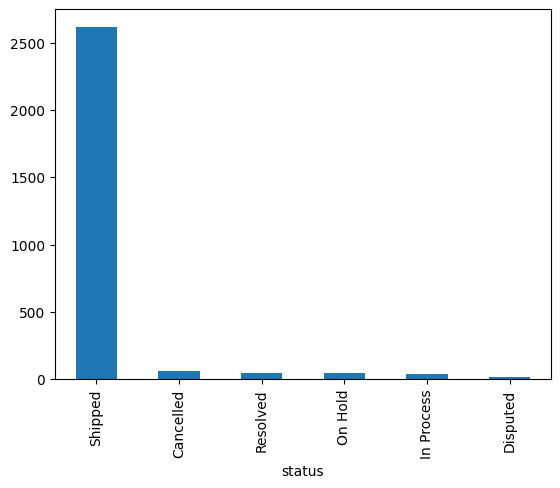

In [108]:
sales['status'].value_counts().plot(kind='bar')

In [109]:
sales['productline'].value_counts()

productline
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [110]:
## sales from ..... to ....
start_date = sales['orderdate'].min()
end_date = sales['orderdate'].max()

print(start_date)
print(end_date)

2003-01-06 00:00:00
2005-05-31 00:00:00


# Data Visulization 

# 1] Sales Performance

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

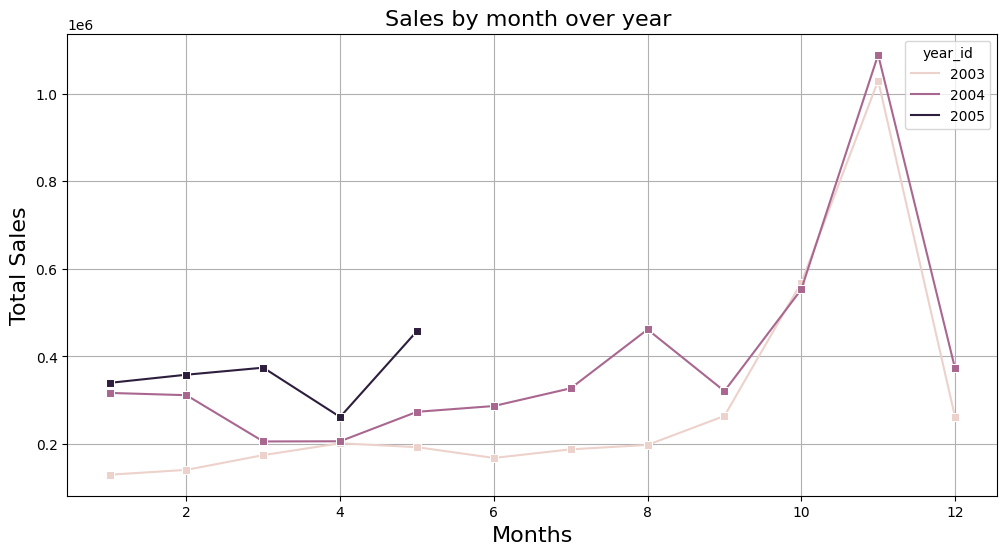

In [111]:
## overall sales trends 

monthly_sales_trends = sales.groupby(['year_id','month_id'])['sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(monthly_sales_trends , x='month_id' , y='sales' , hue = 'year_id' , marker = 's')

plt.title("Sales by month over year " , fontsize = 16)
plt.xlabel("Months" , fontsize = 16)
plt.ylabel("Total Sales" , fontsize =16)
plt.grid()
plt.show()

* **Year on Year sales** : Increase from 2003 to 2005
* **Trend** : Upward from Jan to Dec
* **Seasonable Spike** : In dec sales increase for every year .
* Conclusion : High demand should be neccessary in dec of 2005 than previous .

In [112]:
## Quarterly Sales Trends 

quarterly_sales_trends = sales.groupby(['year_id','qtr_id'])['sales'].sum().reset_index()

plt.figure(figsize =(12,6))
sns.lineplot(quaterly_sales_trends , x='qtr_id' , y='sales' , hue = 'year_id' , marker = 'o')
plt.title("Quarterly sale over year" , fontsize =16)
plt.xlabel("Quarter" ,fontsize =16)
plt.ylabel("Total Sales" , fontsize =16)
plt.grid()
plt.show()

NameError: name 'quaterly_sales_trends' is not defined

<Figure size 1200x600 with 0 Axes>

**Strong Q4 Performance:** Sales significantly increase in the fourth quarter across all years.

In [ ]:
## sales Trends For the Productline 
sales_by_productline = sales.groupby(sales['productline'])['sales'].sum().reset_index().sort_values(by='sales' ,ascending=False)

plt.figure(figsize=(16,2))
sns.barplot(data = sales_by_productline , x = 'productline' , y = 'sales' , palette='dark')
plt.title("Sales_by_productline" , fontsize =16)
plt.xlable("Productlines" , fontsize = 16)
plt.ylable("Total Sales" , fontsize = 16)
plt.grid()
plt.show()

In [ ]:
sales_pivot = pd.pivot_table(sales , index = 'productline' , values = 'sales' , aggfunc = 'sum')

total_sales = sales_pivot['sales'].sum()

sales_pivot['%_of_sales'] = (sales_pivot['sales']/total_sales)*100
sales_pivot

In [ ]:
sales_deal_size_pivot = pd.pivot_table(sales , index = 'dealsize' , values = 'sales' , aggfunc = 'sum')

total_deal_size_sales = sales_deal_size_pivot['sales'].sum()

sales_deal_size_pivot['%_of_sales'] = (sales_deal_size_pivot['sales']/total_deal_size_sales)*100
sales_deal_size_pivot

In [ ]:
plt.figure(figsize =(12,2))
lables = ['Large' , 'Medium', 'Small']
colors = sns.color_palette("pastel")

plt.pie(sales_deal_size_pivot['%_of_sales'] , labels = lables , colors = colors , autopct = '%1.1f%%')
plt.title("Sales % by Dealsize" , fontsize =16)
plt.show()

Medium dealsize contributing round 60% to Revenue and Classic cars round 40% .

In [ ]:
sales_by_productline_dealsize = sales.groupby(['productline','dealsize'])['sales'].agg(['sum','mean','count']).reset_index().sort_values(by = 'sum' , ascending = False)
sales_by_productline_dealsize.rename(columns = {'sum' : 'Total Revenue' , 'mean':'Avg Revenue' , 'count':'Orders'} , inplace =True)
sales_by_productline_dealsize

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = sales_by_productline_dealsize , x = 'dealsize' , y = 'Total Revenue' , hue = 'productline' , palette = 'tab10')
plt.title("sales_by_productline_dealsize")
plt.xlabel("Dealsize" , fontsize = 16)
plt.ylabel("Total Sales" , fontsize =16)
plt.grid()
plt.show()

In [ ]:
## total orders 
total_orders = sales['ordernumber'].nunique()
total_orders

In [ ]:
## total_Revenue , Average_Revenue 

total_revenue = sales['sales'].sum()

avg_revenue = total_revenue / total_orders
print(total_revenue)
print(avg_revenue)

# 2] Customer Behavior

In [ ]:
## Top customer contributing to revenue 

top_customer_by_revenue = sales.groupby(['customername'])['sales'].sum().reset_index().sort_values(by = 'sales' , ascending = False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data =top_customer_by_revenue, x = 'customername', y= 'sales', palette = 'magma')

## Add titles and labels
plt.title('Top 10 Customers by Revenue', fontsize =16)
plt.xlabel('Customer Name', fontsize = 12)
plt.ylabel('Total Revenue', fontsize = 12)
plt.xticks(rotation =45)
plt.yticks(range(0,1000001,200000))

plt.tight_layout()
plt.show()

In [ ]:
total_revenue_customer = top_customer_by_revenue['sales'].sum()

contribution_by_customer = (total_revenue_customer / total_revenue)*100

contribution_by_customer

Top 10 customer contributing round 30% to total revenue 

In [ ]:
## Frequent orders by grouping and counting unique ordernumbers
frequent_orders = sales.groupby(['customername','country','productline','dealsize'])['ordernumber'].nunique().reset_index().sort_values(by='ordernumber', ascending = False).head(20)

## renaming for clarity
frequent_orders.rename(columns = {'ordernumber':'unique order'}, inplace =True)

frequent_orders

# 3] Geographical Analysis

In [ ]:
## getting top countries
top_countries = sales.groupby(['country'])['sales'].sum().sort_values(ascending = False).head(10).index
##getting top countries data
top_country_df = sales[sales['country'].isin(top_countries)]
## getting revenue for each city wise productlines
revenue_by_top_countries = top_country_df.groupby(['country' , 'productline'])['sales'].sum().reset_index()

revenue_by_top_countries


In [ ]:
# Pivot data for stacking
stacked_data = revenue_by_top_countries.pivot(index='country', columns='productline', values='sales')

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))

plt.title("Stacked Revenue by Product Line for Top 10 Countries", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Product Line", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In the USA, Vintage Cars and Classic Cars are the top-performing product categories, driving significant revenue growth.

In [ ]:
USA_df = sales[sales['country']=='USA']
USA_revenue = USA_df['sales'].sum()

USA_contribution = (USA_revenue / total_revenue) * 100

USA_contribution

The USA accounts for 36.16% of the overall revenue, making it a key market

# 4] Product Demand

In [ ]:
popular_products_by_volume = sales.groupby(['productcode','productline'])['quantityordered'].sum().reset_index().sort_values(by='quantityordered', ascending =False).head(10)

popular_products_by_volume

In [ ]:
## pivot table for stacked bar chart

pivot_data = popular_products_by_volume.pivot(index= 'productcode' , columns = 'productline' , values = 'quantityordered').fillna(0)
pivot_data['Total_orders'] = pivot_data.sum(axis=1)

pivot_data = pivot_data.sort_values(by ='Total_orders' , ascending =False).drop(columns = ['Total_orders'])

pivot_data.plot(kind ='barh' , stacked = True , figsize = (12,8) , colormap = 'tab10') 

## Add Titles and labels
plt.title('Top 10 Products by Quantity Ordered and Product Line', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product Code', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
## demanding product in each month 

product_demand_each_month = sales.groupby(['month_id','productline'])['quantityordered'].sum().reset_index().sort_values(by = 'quantityordered' , ascending=False)

plt.figure(figsize = (12,8))
sns.lineplot( data = product_demand_each_month , x = 'month_id' , y = 'quantityordered' , hue = 'productline' , palette = 'tab10')

plt.title("Product Demand For Each Month" , fontsize =12)
plt.xlabel("Months" , fontsize = 12)
plt.ylable("Quantity" , fontsize =12)
plt.grid()
plt.show()

In [ ]:
## Product Demand by each Year by grouping Month_id and Product line together and summing quantity ordered 
product_demand_by_each_year = sales.groupby(['year_id','productline'])['quantityordered'].sum().reset_index().sort_values(by = 'quantityordered', ascending = False)

## Plot barplot
plt.figure(figsize = (12,5))
sns.lineplot(product_demand_by_each_year, x = "year_id", y = 'quantityordered', hue = 'productline', marker='o')

# Add titles and labels
plt.title('Product Demand by Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2003,2006,1))

plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

Key Insights:

1. **November shows a significant spike** in sales, indicating strong seasonal demand.
2. Sales peaked , suggesting a **high demand during the final quarter **of the year.
3. The **'Classic Cars' product line generated the highest revenue**, contributing **39%** of total sales.
4. **'Trains'** are among the **lowest-performing product lines** in terms of sales.
5. Medium deal sizes contribute more revenue for 'Classic Cars' than any other product line.
6. **Medium-sized products** are the **most popular** across all product lines.
7. The **top 10 customers** accounted for approximately **30%** of total revenue.
8. Most of the **top customers are from the 'Classic Cars'** product line.
9. The **Euro Shopping Channel has the most frequent orders**, indicating high customer loyalty.
10. The **'Classic Cars'** product line is associated with frequent orders, especially in** Spain**.
11. The **USA generates the most revenue**, with 'Classic Cars' being the top-selling product.
12. **Classic Cars show consistent demand across all years**.
